In [37]:
import pandas as pd
import numpy as np
import matplotlib as mt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

Wczytanie danych

In [2]:
dane_proba = pd.read_csv('../dane/Weather.csv', sep=',')
dane_proba.head()

,Unnamed: 0,city,date,year,month,day,high_temp,avg_temp,low_temp,high_dewpt,...,avg_hg,low_hg,high_vis,avg_vis,low_vis,high_wind,avg_wind,low_wind,precip,events
0,1,Auckland,2016-01-01,2016,1,1,68,65,62,64,...,30.09,30.01,6,6,4,21,15,28.0,0,Rain
1,2,Auckland,2016-01-02,2016,1,2,68,66,64,64,...,29.90,29.80,6,5,1,33,21,46.0,0,Rain
2,3,Auckland,2016-01-03,2016,1,3,77,72,66,70,...,29.73,29.68,6,6,1,18,12,NaN,0,Rain
3,4,Auckland,2016-01-04,2016,1,4,73,66,60,66,...,29.90,29.77,6,6,6,15,10,NaN,0,Rain
4,5,Auckland,2016-01-05,2016,1,5,69,62,55,55,...,30.14,30.09,6,6,6,13,7,NaN,0,NaN


In [3]:
dane = pd.read_csv('../dane/Weather.csv', sep=',', usecols = list(range(1,dane_proba.shape[1])))
dane.head()

,city,date,year,month,day,high_temp,avg_temp,low_temp,high_dewpt,avg_dewpt,...,avg_hg,low_hg,high_vis,avg_vis,low_vis,high_wind,avg_wind,low_wind,precip,events
0,Auckland,2016-01-01,2016,1,1,68,65,62,64,60,...,30.09,30.01,6,6,4,21,15,28.0,0,Rain
1,Auckland,2016-01-02,2016,1,2,68,66,64,64,63,...,29.90,29.80,6,5,1,33,21,46.0,0,Rain
2,Auckland,2016-01-03,2016,1,3,77,72,66,70,67,...,29.73,29.68,6,6,1,18,12,NaN,0,Rain
3,Auckland,2016-01-04,2016,1,4,73,66,60,66,60,...,29.90,29.77,6,6,6,15,10,NaN,0,Rain
4,Auckland,2016-01-05,2016,1,5,69,62,55,55,52,...,30.14,30.09,6,6,6,13,7,NaN,0,NaN


In [4]:
dane.columns

Index(['city', 'date', 'year', 'month', 'day', 'high_temp', 'avg_temp',
       'low_temp', 'high_dewpt', 'avg_dewpt', 'low_dewpt', 'high_humidity',
       'avg_humidity', 'low_humidity', 'high_hg', 'avg_hg', 'low_hg',
       'high_vis', 'avg_vis', 'low_vis', 'high_wind', 'avg_wind', 'low_wind',
       'precip', 'events'],
      dtype='object')

In [5]:
dane.dtypes

city              object
date              object
year               int64
month              int64
day                int64
high_temp          int64
avg_temp           int64
low_temp           int64
high_dewpt         int64
avg_dewpt          int64
low_dewpt          int64
high_humidity      int64
avg_humidity       int64
low_humidity       int64
high_hg          float64
avg_hg           float64
low_hg           float64
high_vis           int64
avg_vis            int64
low_vis            int64
high_wind          int64
avg_wind           int64
low_wind         float64
precip            object
events            object
dtype: object

# Braki w danych

In [6]:
dane.isna().sum()

city                0
date                0
year                0
month               0
day                 0
high_temp           0
avg_temp            0
low_temp            0
high_dewpt          0
avg_dewpt           0
low_dewpt           0
high_humidity       0
avg_humidity        0
low_humidity        0
high_hg             0
avg_hg              0
low_hg              0
high_vis            0
avg_vis             0
low_vis             0
high_wind           0
avg_wind            0
low_wind         1326
precip              0
events           2217
dtype: int64

In [7]:
dane.shape

(3655, 25)

In [8]:
#zamina Nan -> 'no events'

In [9]:
dane['events'] = dane['events'].fillna('No event')

In [10]:
dane['precip'] = dane['precip'].replace('T', 0.001)

In [11]:
#przeliczenie temp na st C
#wykres, wnioski, sprawdzenie źródla danych i zmiana nazwy low_wind -> max_wind_gust
#zamiana tam Nan -> 0
dane['low_wind'] = dane['low_wind'].fillna(0)

In [12]:
dane.rename(columns={'low_wind': 'max_wind_gust'}, inplace = True)

In [13]:
dane['events'].unique()

array(['Rain', 'No event', 'Fog , Rain , Thunderstorm', 'Fog , Rain',
       'Rain , Thunderstorm', 'Rain , Hail', 'Fog', 'Thunderstorm',
       'Rain , Hail , Thunderstorm', 'Snow', 'Rain , Snow',
       'Fog , Thunderstorm', 'Fog , Snow', 'Fog , Rain , Snow',
       'Fog , Snow , Thunderstorm'], dtype=object)

In [14]:
def create(x):
    dane[x] = dane['events']
#dane['Rain'] = dane['Rain'].map({"Rain": 1}).fillna(0)
    dane[x] = [i.find(x) for i in dane[x]]
    dane[x] = dane[x].map({-1: 0}).fillna(1)
    
create("Rain")
create("Fog")
create("Thunderstorm")
create("Snow")
create("Hail")

In [15]:
#wykres

In [16]:
#zamiana

In [17]:
dane.head()

,city,date,year,month,day,high_temp,avg_temp,low_temp,high_dewpt,avg_dewpt,...,high_wind,avg_wind,max_wind_gust,precip,events,Rain,Fog,Thunderstorm,Snow,Hail
0,Auckland,2016-01-01,2016,1,1,68,65,62,64,60,...,21,15,28.0,0,Rain,1.0,0.0,0.0,0.0,0.0
1,Auckland,2016-01-02,2016,1,2,68,66,64,64,63,...,33,21,46.0,0,Rain,1.0,0.0,0.0,0.0,0.0
2,Auckland,2016-01-03,2016,1,3,77,72,66,70,67,...,18,12,0.0,0,Rain,1.0,0.0,0.0,0.0,0.0
3,Auckland,2016-01-04,2016,1,4,73,66,60,66,60,...,15,10,0.0,0,Rain,1.0,0.0,0.0,0.0,0.0
4,Auckland,2016-01-05,2016,1,5,69,62,55,55,52,...,13,7,0.0,0,No event,0.0,0.0,0.0,0.0,0.0


# Redukcja wymiaru

[0.44234387 0.58855213 0.72693874 0.80745081 0.85704889 0.90429843
 0.93900113 0.96088228 0.97610026 0.98793343 0.99161925 0.99439933
 0.99605371 0.99749422 0.99872107 0.99961847 0.99982701 0.99998372
 1.        ]


/usr/lib/python3/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.



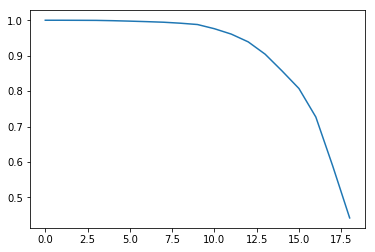

In [18]:
x = dane.iloc[:, 5:24].values
x = StandardScaler().fit_transform(x)

pca = PCA()
principalComponents = pca.fit_transform(x)
print(pca.explained_variance_ratio_.cumsum()) #4 na poziomie odcięcia 0.8
data = pca.explained_variance_ratio_.cumsum()[::-1] 
sns.lineplot(y =data, x = list(range(len(data)))) #optymalnie 10

In [64]:
#wizualizacja - 3

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
pca.explained_variance_ratio_.cumsum()

df1 = pd.DataFrame(data = principalComponents
                           , columns = ['PC1', 'PC2',  'PC3'])
df2 = pd.concat([principalDf, dane[['events']]], axis = 1)

#sns.scatterplot(data = finalDf, x = 'principal component 1', y = 'principal component 2', hue='species')

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(df1['PC1'], df1['PC2'], df1['PC3'], s=60, label=dane[['events']], alpha=0.70, c= dane['events'], cmap=cm.brg)
#ax.view_init(30, 185)
#plt.show()

In [62]:
#https://towardsdatascience.com/customizing-plots-with-python-matplotlib-bcf02691931f